# Reading and Writing Files

Using the Canonical name of the file depends on the below factors:

- case sensitivity
- file system (Unix vs. Windows -  forward vs. backward slash) since backward slash is used for escaping

`"/dir/file"` vs `"dir\file"` are different but Python provides a way to read the files.

Also, the program will not interact with the file directly rather it uses some abstract entities for these operations:
`handles` or `streams`

The operations performed with the abstract stream reflect the activities related to the physical file.

- open the file   - connect the stream with the file        -   `open()`
- close the file  - disconnecting the stream with the file  -   `close()`





File reading vis Streams

- declare an open mode : read or write
- there are three basic modes : read, write, update
    - read: a stream opened in this mode allows read operations only; trying to write to the stream will cause an exception (the exception is named UnsupportedOperation, which inherits OSError and ValueError, and comes from the io module);
    - write: a stream opened in this mode allows write operations only; attempting to read the stream will cause the exception mentioned above;
    - update: a stream opened in this mode allows both writes and reads.

Python assumes that every file is hidden behind an object of an adequate class. This adequate class comes from either of the below:

IOBase 
<br>  |
<br>  |---> RawIOBase
<br>  |---> BufferedIOBase
<br>  |---> TextIOBase

Based on the type of stream contents, all streams are divided into text and binary streams.

Text Streams   - structured in lines, arranged in rows
Binary Streams - sequence of bytes of any value for example image, audio, video etc.

Key takeaways : '
- Unix system line endings are marked by a single character `LF` (Line Feed)
- Windows line endings are marked by a pair of characters `CRLF` (Carriage Return Line Feed)

Python handles this issue internally by a process called a translation of newline characters occurs: when you read a line from the file, every pair of \r\n characters is replaced with a single \n character, and vice versa; during write operations, every \n character is replaced with a pair of \r\n characters.


##### Operating a stream - stream.open() and stream.close()

`streams = open(file, mode = 'r', encoding=None)`

- the name of the function (open) speaks for itself; if the opening is successful, the function returns a stream object; otherwise, an exception is raised (e.g., FileNotFoundError if the file you're going to read doesn't exist);

- the first parameter of the function (file) specifies the name of the file to be associated with the stream;

- the second parameter (mode) specifies the open mode used for the stream; it's a string filled with a sequence of characters, and each of them has its own special meaning (more details soon);

- the third parameter (encoding) specifies the encoding type (e.g., UTF-8 when working with text files)

- the opening must be the very first operation performed on the stream.

If there is a letter b at the end of the mode string, it means that the stream is to be opened in binary mode.

If the mode string ends with a letter t, the stream is opened in text mode.

Text mode is the default behaviour assumed when no binary/text mode specifier is used.

Finally, the successful opening of a file will set the current file position (the virtual reading/writing head) before the first byte of the file if the mode is not a and after the last byte of the file if the mode is set to a.

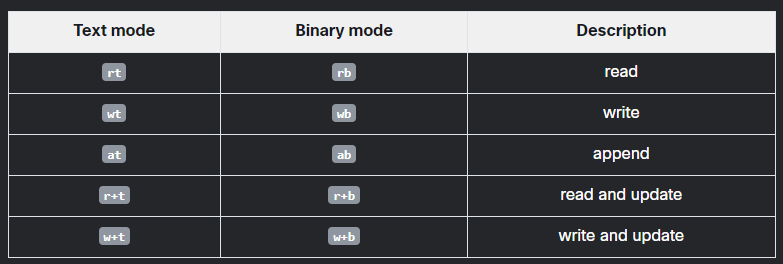


``` python

try:
    stream = open(filename, 'w', None)
    # do some processing
    stream.close()
except:
    # handle exceptions here

```

In [9]:
# this makes used of the except's 'as' function to handle the `errno` property 
import errno

try:
    s = open("c:/users/user/Desktop/file.txt", "wt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    if exc.errno == errno.ENOENT:
        print("The file doesn't exist.")
    elif exc.errno == errno.EMFILE:
        print("You've opened too many files.")
    else:
        print("The error number is:", exc.errno)

The file doesn't exist.


In [8]:
from os import strerror

try:
    s = open("C:/Users/nelso/OneDrive/Desktop/pylearn.txt", "wt")
    s.write("ETERNAL MANGEYKUO SHARIGAN")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    print("The file could not be opened:", strerror(exc.errno))

In [10]:
from os import strerror

try:
    counter = 0
    stream = open('text.txt', "rt")
    char = stream.read(1)       # try reading the first character
    while char != '':
        print(char, end='')
        counter += 1
        char = stream.read(1)   # try reading the next character
    stream.close()
    print("\n\nCharacters in file:", counter)
except IOError as e:
    print("I/O error occurred: ", strerror(e.errno))
    

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.

Characters in file: 131


##### readline()

If you want to treat the file's contents as a set of lines, not a bunch of characters, the readline() method will help you with that.

The method tries to read a complete line of text from the file, and returns it as a string in the case of success. Otherwise, it returns an empty string.

In [19]:
from os import strerror

try:
    character_counter = line_counter = 0
    stream = open('text.txt', 'rt')
    line = stream.readline()
    while line != '':
        line_counter += 1
        for char in line:
            print(char, end='')
            character_counter += 1
        line = stream.readline()
    stream.close()
    print("\n\nCharacters in file:", character_counter)
    print("Lines in file:     ", line_counter)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.

Characters in file: 131
Lines in file:      4


##### readlines()

The readlines() method, when invoked without arguments, tries to read all the file contents, and returns a list of strings, one element per file line.

In [20]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open('text.txt', 'rt')
    lines = s.readlines(20)
    while len(lines) != 0:
        for line in lines:
            lcnt += 1
            for ch in line:
                print(ch, end='')
                ccnt += 1
        lines = s.readlines(10)
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))
    

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.

Characters in file: 131
Lines in file:      4


In [24]:
"""
The open() method returns an iterable object 
which can be used to iterate through all the file's lines inside a for loop.
The iteration protocol defined for the file object is very simple – 
its __next__ method just returns the next line read in from the file.

Moreover, you can expect that the object automatically invokes close() 
when any of the file reads reaches the end of the file.
"""

from os import strerror

try:
	ccnt = lcnt = 0
	for line in open('text.txt', 'rt'):
		lcnt += 1
		for ch in line:
			print(ch, end='')
			ccnt += 1
	print("\n\nCharacters in file:", ccnt)
	print("Lines in file:     ", lcnt)
except IOError as e:
	print("I/O error occurred: ", strerror(e.errno))


Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.

Characters in file: 131
Lines in file:      4


##### write()

The method is named write() and it expects just one argument – a string that will be transferred to an open file (don't forget – open mode should reflect the way in which the data is transferred – writing a file opened in read mode won't succeed).

In [25]:
from os import strerror

try:
	file = open('newtext.txt', 'wt') # A new file (newtext.txt) is created.
	for i in range(10):
		s = "line #" + str(i+1) + "\n"
		for char in s:
			file.write(char)
	file.close()
except IOError as e:
	print("I/O error occurred: ", strerror(e.errno))

In [26]:
from os import strerror

try:
    file = open('newtext.txt', 'wt')
    for i in range(10):
        file.write("line #" + str(i+1) + "\n")
    file.close()
except IOError as e:
    print("I/O error occurred: ", strerror(e.errno))
    

##### bytearray()

Amorphous data is data which have no specific shape or form – they are just a series of bytes.
Amorphous data cannot be stored using any of the previously presented means – they are neither strings nor lists.

There should be a special container able to handle such data.

Python has more than one such container – one of them is a specialized class name bytearray – as the name suggests, it's an array containing (amorphous) bytes.

In [27]:
data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i

for b in data:
    print(hex(b))
    

0xa
0x9
0x8
0x7
0x6
0x5
0x4
0x3
0x2
0x1


In [28]:
from os import strerror

data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 + i

try:
    bf = open('file.bin', 'wb')
    bf.write(data)
    bf.close()
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))


##### readinto()

Reading from a binary file requires the use of a specialized method name readinto(), as the method doesn't create a new byte array object, but fills a previously created one with the values taken from the binary file.

Note:

the method returns the number of successfully read bytes;
the method tries to fill the whole space available inside its argument; if there are more data in the file than space in the argument, the read operation will stop before the end of the file; otherwise, the method's result may indicate that the byte array has only been filled fragmentarily (the result will show you that, too, and the part of the array not being used by the newly read contents remains untouched)


In [29]:
from os import strerror

data = bytearray(10)

try:
    binary_file = open('file.bin', 'rb')
    binary_file.readinto(data)
    binary_file.close()

    for b in data:
        print(hex(b), end=' ')
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

0xa 0xb 0xc 0xd 0xe 0xf 0x10 0x11 0x12 0x13 

##### read()
An alternative way of reading the contents of a binary file is offered by the method named read().

Invoked without arguments, it tries to read all the contents of the file into the memory, making them a part of a newly created object of the bytes class.

This class has some similarities to bytearray, with the exception of one significant difference – it's immutable.

In [30]:
from os import strerror

try:
    binary_file = open('file.bin', 'rb')
    data = bytearray(binary_file.read())
    binary_file.close()

    for b in data:
        print(hex(b), end=' ')

except IOError as e:
    print("I/O error occurred:", strerror(e.errno))
    

0xa 0xb 0xc 0xd 0xe 0xf 0x10 0x11 0x12 0x13 

# OS Module

- interact with the operating system using Python.


In [44]:
import os

print(os.name)

os.mkdir("my_first_directory_0")  	# creating a directory, re-running this will cause an error
print(os.listdir())

os.makedirs("my_first_directory_1/my_second_directory")
print(os.getcwd())
os.chdir("my_first_directory_1")
print(os.listdir())


# removing a directory
os.rmdir("my_first_directory_1")
# to remove a directory and its subdirectories
os.makedirs("my_first_directory_1/my_second_directory")
os.removedirs("my_first_directory_1/my_second_directory")

nt
['my_first_directory_0', 'my_second_directory']
c:\Users\nelso\OneDrive\Documents\GitHub\python-essentials\notebooks\my_first_directory\my_first_directory_1\my_first_directory_1\my_first_directory_1
['my_second_directory']


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'my_first_directory_1'

In [45]:
# using the os.system to run the commands directly

import os

returned_value = os.system("mkdir my_first_directory")
print(returned_value)

0
